In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.pyplot as mcolors
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
import datetime
import time
import random
from sklearn.svm import SVR
import operator
from mpl_toolkits.mplot3d import Axes3D


In [2]:
Pak = pd.read_csv("datasets_613247_1152509_PK COVID-19-10may.csv")
rows, cols = Pak.shape
print(rows)
print(cols)

1328
7


In [3]:
Pak.style.background_gradient(cmap='Reds')

In [4]:
Pak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1328 non-null   object
 1   Cases           1328 non-null   int64 
 2   Deaths          1328 non-null   int64 
 3   Recovered       1328 non-null   int64 
 4   Travel_history  1205 non-null   object
 5   Province        1328 non-null   object
 6   City            1328 non-null   object
dtypes: int64(3), object(4)
memory usage: 72.8+ KB


In [5]:
Pak.describe()

,Cases,Deaths,Recovered
count,1328.000000,1328.000000,1328.000000
mean,22.647590,0.455572,2.467620
std,82.977344,1.804996,11.861503
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000
75%,10.000000,0.000000,0.000000
max,1080.000000,31.000000,208.000000


In [6]:
#missing_count stores percent value of each col
missing_count= (Pak.isnull().sum()/ len(Pak)) *100

#filter on missing count
print(missing_count.sort_values(ascending=False))

#9.26% of travel history is missing

Travel_history    9.262048
City              0.000000
Province          0.000000
Recovered         0.000000
Deaths            0.000000
Cases             0.000000
Date              0.000000
dtype: float64


# DATA CLEANING

In [7]:
#Formatting date 
t=[]
for i in range(rows):
    t=Pak['Date'].astype(str).str[0]
    t=t.astype(int)
    
for i in range(rows):
    if t[i] > 0:
        Pak['Date'][i]='0'+Pak['Date'][i]
Pak['Date'] 

0       02/26/2020
1       02/26/2020
2       02/29/2020
3       02/29/2020
4       03/02/2020
           ...    
1323    05/10/2020
1324    05/10/2020
1325    05/10/2020
1326    05/10/2020
1327    05/10/2020
Name: Date, Length: 1328, dtype: object

In [8]:
Pak.isnull().sum()

Date                0
Cases               0
Deaths              0
Recovered           0
Travel_history    123
Province            0
City                0
dtype: int64

In [9]:
#Removing NA from dataframe
Pak.dropna(axis="rows", how="any", inplace = True)
Pak.reset_index(drop=True, inplace=True)

In [10]:
Pak.isnull().sum()

Date              0
Cases             0
Deaths            0
Recovered         0
Travel_history    0
Province          0
City              0
dtype: int64

In [11]:
Pak['Date']=Pak['Date'].astype(str)
Pak['Cases']=Pak['Cases'].astype(int)
Pak['Deaths']=Pak['Deaths'].astype(int)
Pak['Recovered']=Pak['Recovered'].astype(int)
Pak['Travel_history']=Pak['Travel_history'].astype(str)
Pak['Province']=Pak['Province'].astype(str)
Pak['City']=Pak['City'].astype(str)

In [12]:
numeric_data=Pak.select_dtypes(include = [np.number])
cat_data=Pak.select_dtypes(exclude = [np.number])

print('there are {0} numerical and {1} categorical columns'.\
      format(numeric_data.shape[1],cat_data.shape[1]))

there are 3 numerical and 4 categorical columns


# Data Mining 

# Univarate Analysis

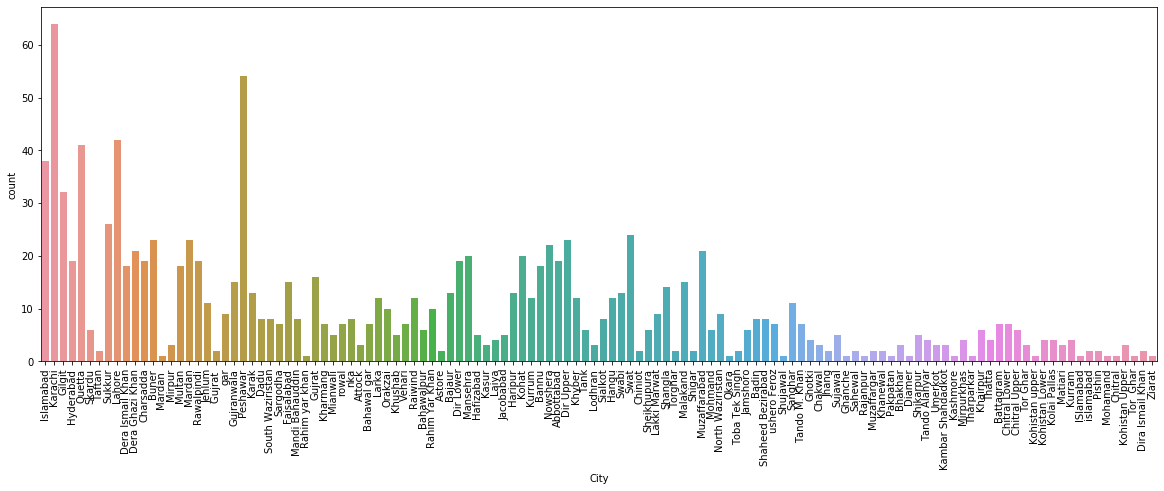

In [13]:
fig = plt.figure(figsize = (20,30))
axes = 410
axes += 1
fig.add_subplot(axes)
sns.countplot(data = Pak,x = 'City')
plt.xticks(rotation=90)
plt.show()

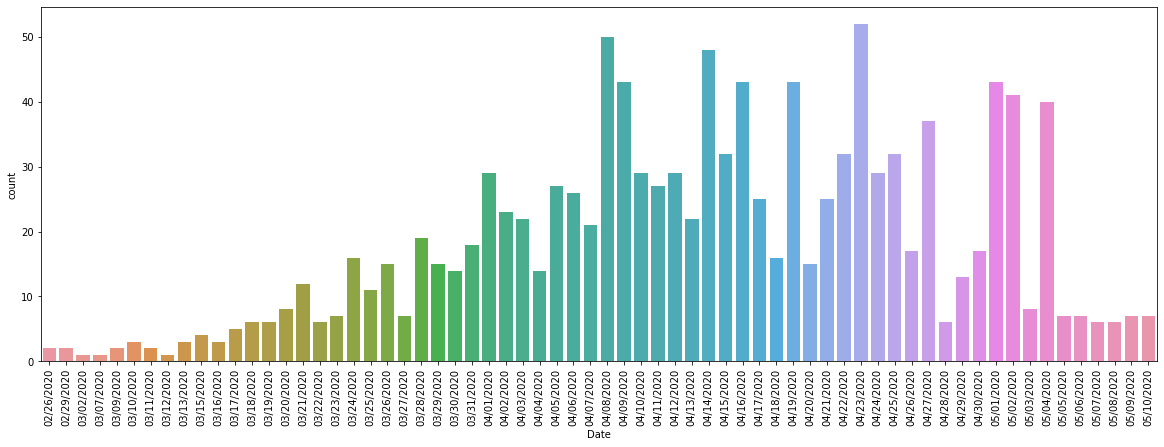

In [14]:
fig = plt.figure(figsize = (20,30))
axes = 410
axes += 1
fig.add_subplot(axes)
sns.countplot(data = Pak,x = 'Date')
plt.xticks(rotation=90)
plt.show()
print('\n')

In [15]:
#travel history where cases are greater than 2
size = dict(Pak['Travel_history'].value_counts()).values()
size =  [v for v in size ]
labels = dict(Pak['Travel_history'].value_counts()).keys()
labels =  [v for v in labels ]

Travel_cases = pd.DataFrame(
    {'Cases': size,
     'Travel history': labels,
    })
most_cases=Travel_cases[Travel_cases['Cases']>2]

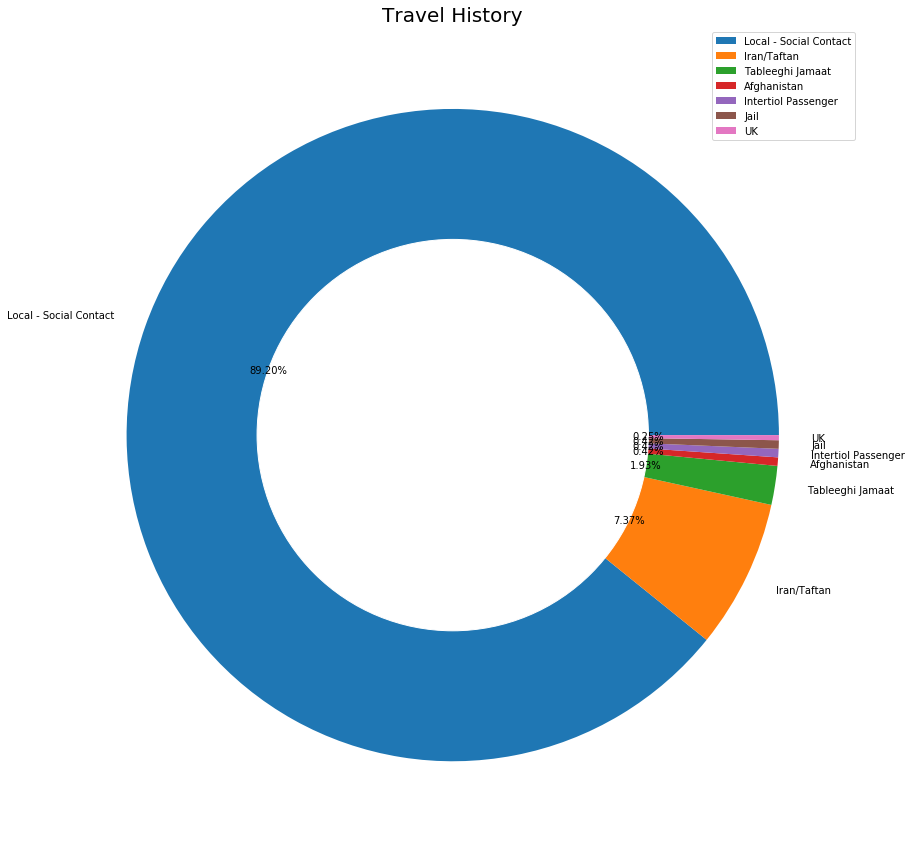

In [16]:
#travel-history wise pie chart where cases > 2
plt.subplots(figsize=(15, 15))

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(most_cases['Cases'], labels =most_cases['Travel history'], shadow = False, autopct = '%.2f%%')
plt.title('Travel History', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

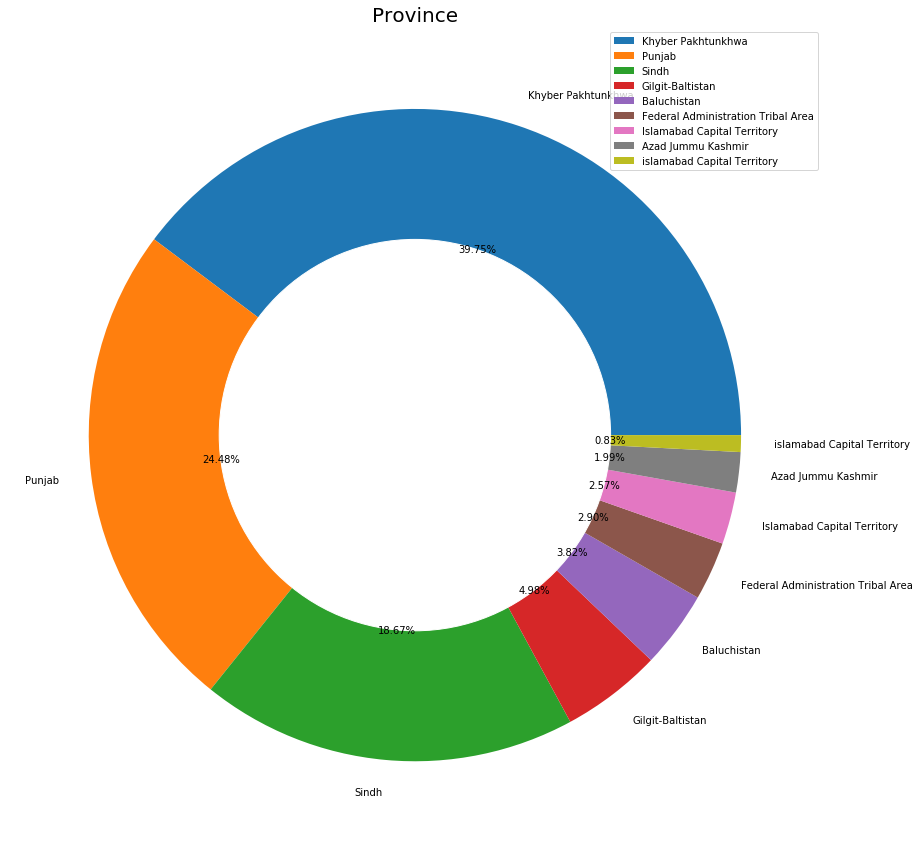

In [17]:
#province-wise piechart
plt.subplots(figsize=(15, 15))
size = dict(Pak['Province'].value_counts()).values()
colors = sns.color_palette()
labels = dict(Pak['Province'].value_counts()).keys()

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(size, colors = colors, labels = labels, shadow = False, autopct = '%.2f%%')
plt.title('Province', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

In [18]:
#to_frame
Pak['Total active'] = Pak['Cases'] - (Pak['Deaths'] + Pak['Recovered'])
total_active = Pak['Total active'].sum()
#print("Total number of active COVID-19 cases across Pakistan: ",total_active)
total_cases = Pak.groupby('City')['Total active'].sum().sort_values(ascending=False).to_frame()
total_cases.style.background_gradient(cmap='Reds')

,Total active
City,
Karachi,8288
Lahore,6283
Peshawar,2427
Quetta,1397
Multan,709
Raiwind,544
Islamabad,530
Rawalpindi,186
Gilgit,164


In [19]:
print(f'Total number of cases registered: '+str(Pak['Cases'].sum()))
print(f'Total Number of deaths registered: '+str(Pak['Deaths'].sum()))
print(f'Total Number of recovered cases registered: '+str(Pak['Recovered'].sum()))
print(f'Total number of active cases registered: '+str(Pak['Total active'].sum()))

Total number of cases registered: 26617
Total Number of deaths registered: 521
Total Number of recovered cases registered: 2837
Total number of active cases registered: 23259


# Multivariate Analysis

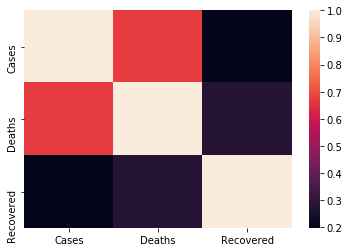

In [20]:
#lighter box shows high co-relation among numeric features
correlation=numeric_data.corr() 
sns.heatmap(correlation)

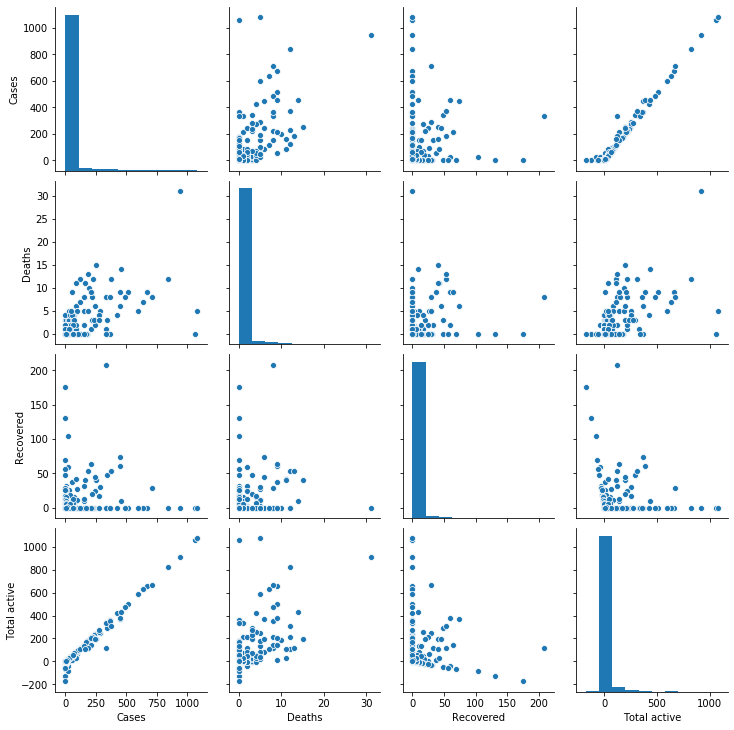

In [21]:
#pairwise distribution, shows histogram and scatter plots, default int variables
sns.pairplot(Pak)

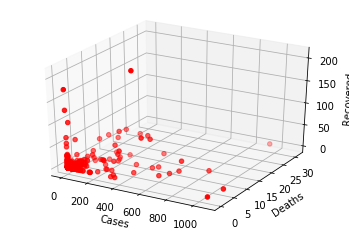

In [22]:
#shows death/recovered/cases in 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =Pak['Cases']
y =Pak['Deaths']
z =Pak['Recovered']
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('Cases')
ax.set_ylabel('Deaths')
ax.set_zlabel('Recovered')

plt.show()


# BIVARIATE ANALYSIS

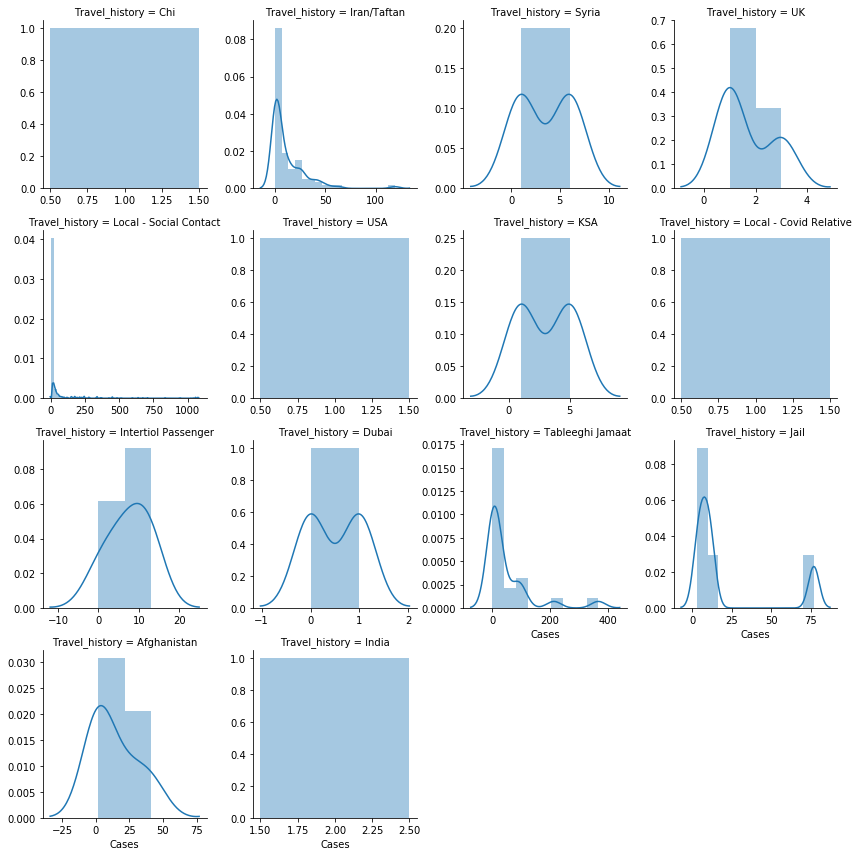

In [23]:
#visualizing cases of travel history
g=sns.FacetGrid(Pak, col= "Travel_history",col_wrap=4,sharex=False,sharey=False )
g=g.map(sns.distplot,'Cases')

Text(0.5, 1.0, 'Covid-19 Confirmed cases in Pakistan')

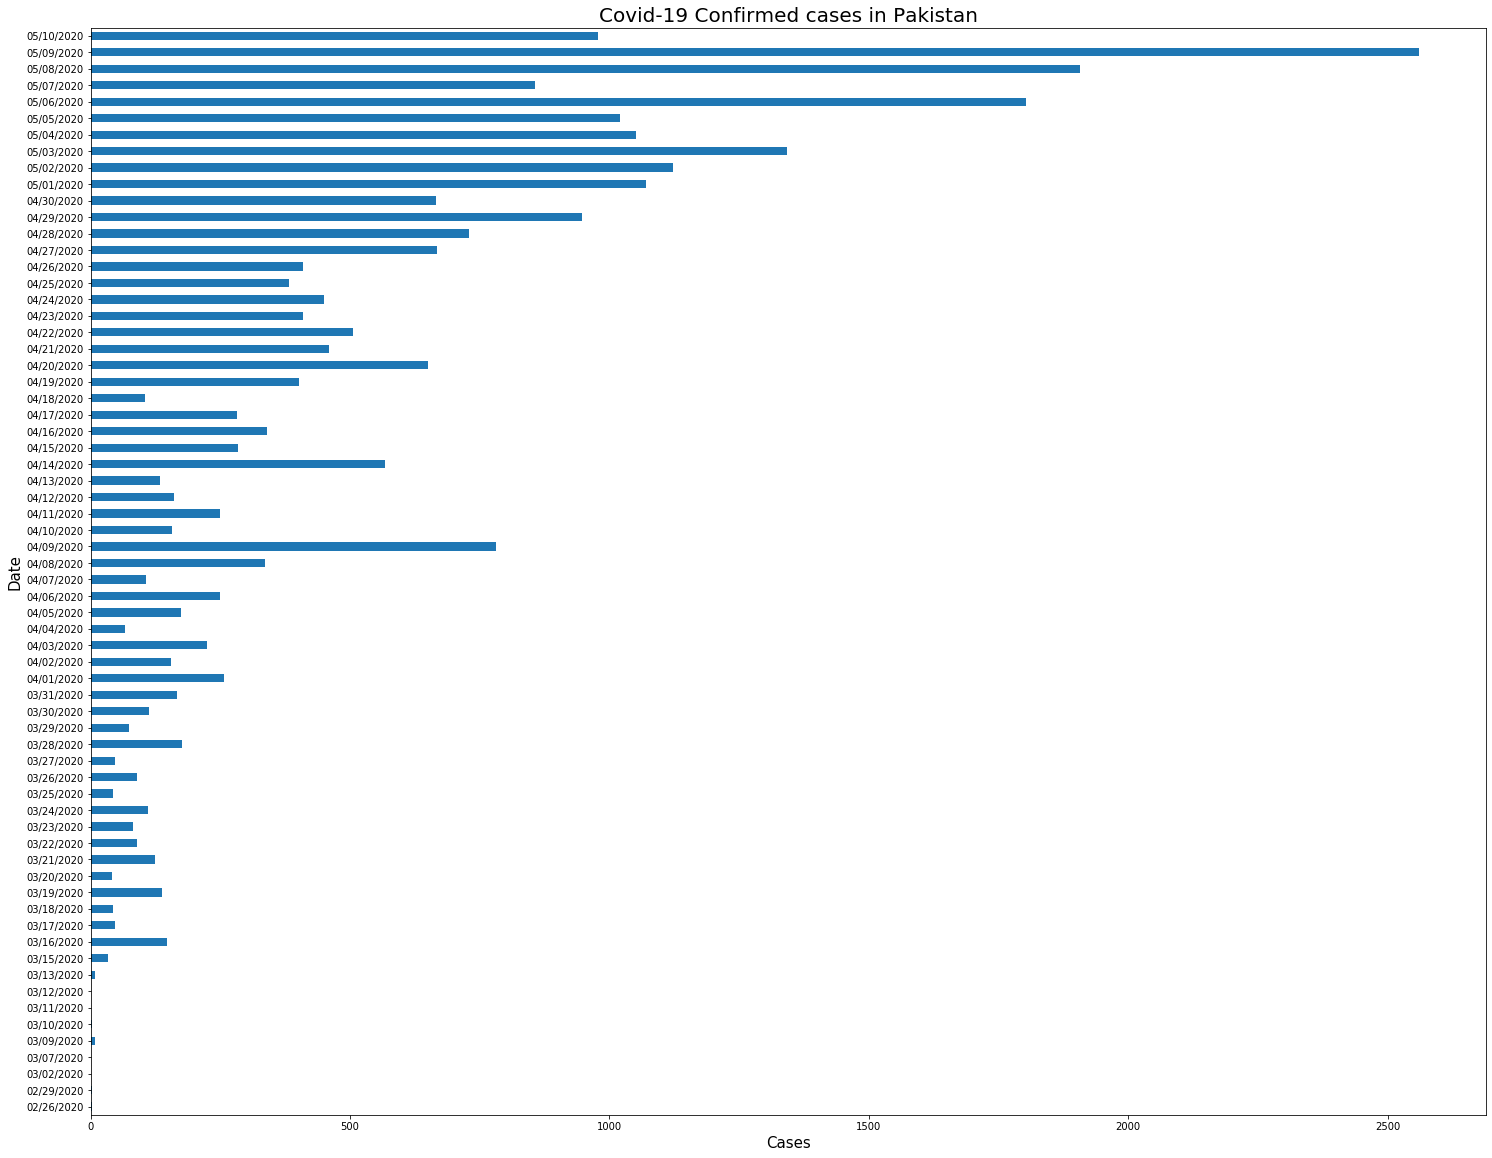

In [24]:
plt.figure(figsize=(10,10))

ax = Pak.groupby('Date')['Cases'].sum().sort_index().plot(kind='barh',figsize=(25,20))
ax.set_xlabel('Cases',fontsize=15)
ax.set_ylabel("Date",fontsize=15)
plt.title('Covid-19 Confirmed cases in Pakistan', fontsize = 20)

In [25]:
date_wise=Pak.groupby('Date')['Cases','Deaths','Recovered'].sum().reset_index()
date_wise

,Date,Cases,Deaths,Recovered
0,02/26/2020,3,0,0
1,02/29/2020,2,0,0
2,03/02/2020,1,0,0
3,03/07/2020,1,0,0
4,03/09/2020,9,0,0
...,...,...,...,...
61,05/06/2020,1804,49,130
62,05/07/2020,857,28,59
63,05/08/2020,1908,31,66
64,05/09/2020,2561,19,71


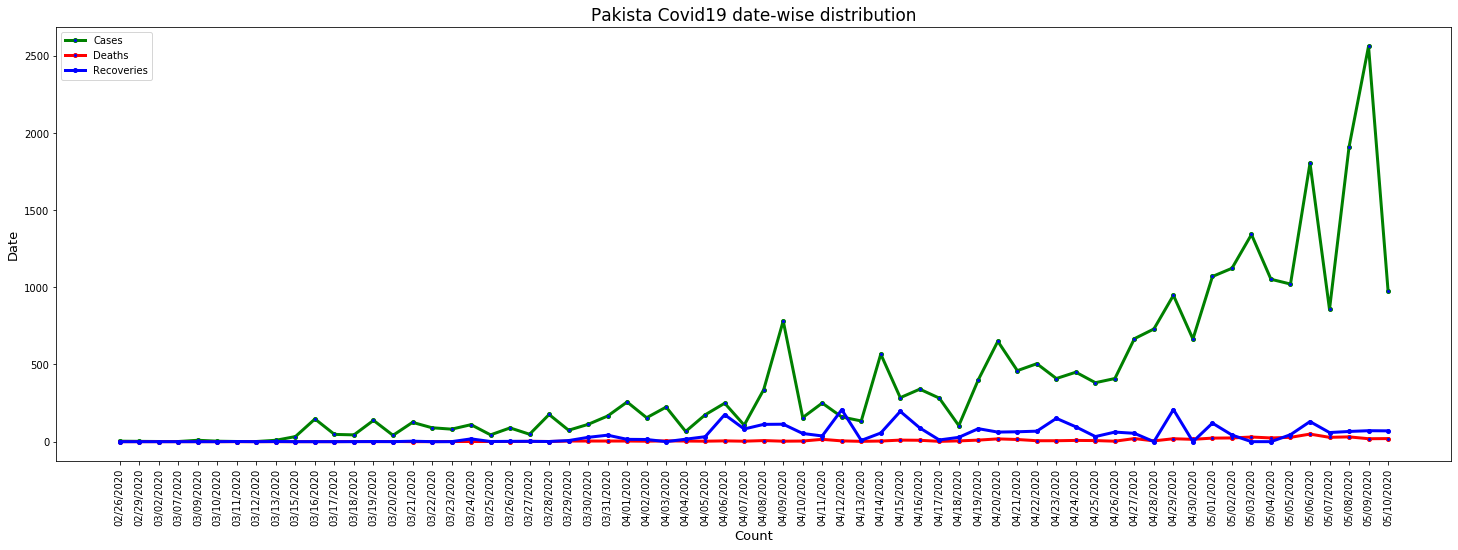

In [26]:
plt.subplots(figsize=(25,8)) 

plt.plot(date_wise['Date'], date_wise['Cases'], color='green', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=4, label = "Cases")
plt.plot(date_wise['Date'], date_wise['Deaths'], color='red', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=4,label = "Deaths")
plt.plot(date_wise['Date'], date_wise['Recovered'], color='blue', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=4,label = "Recoveries")
plt.title('Pakista Covid19 date-wise distribution',fontsize=17) 
plt.xlabel('Count',fontsize=13) 
plt.ylabel('Date',fontsize=13) 
plt.xticks(rotation=90) 

plt.legend()     
# function to show the plot 
plt.show()

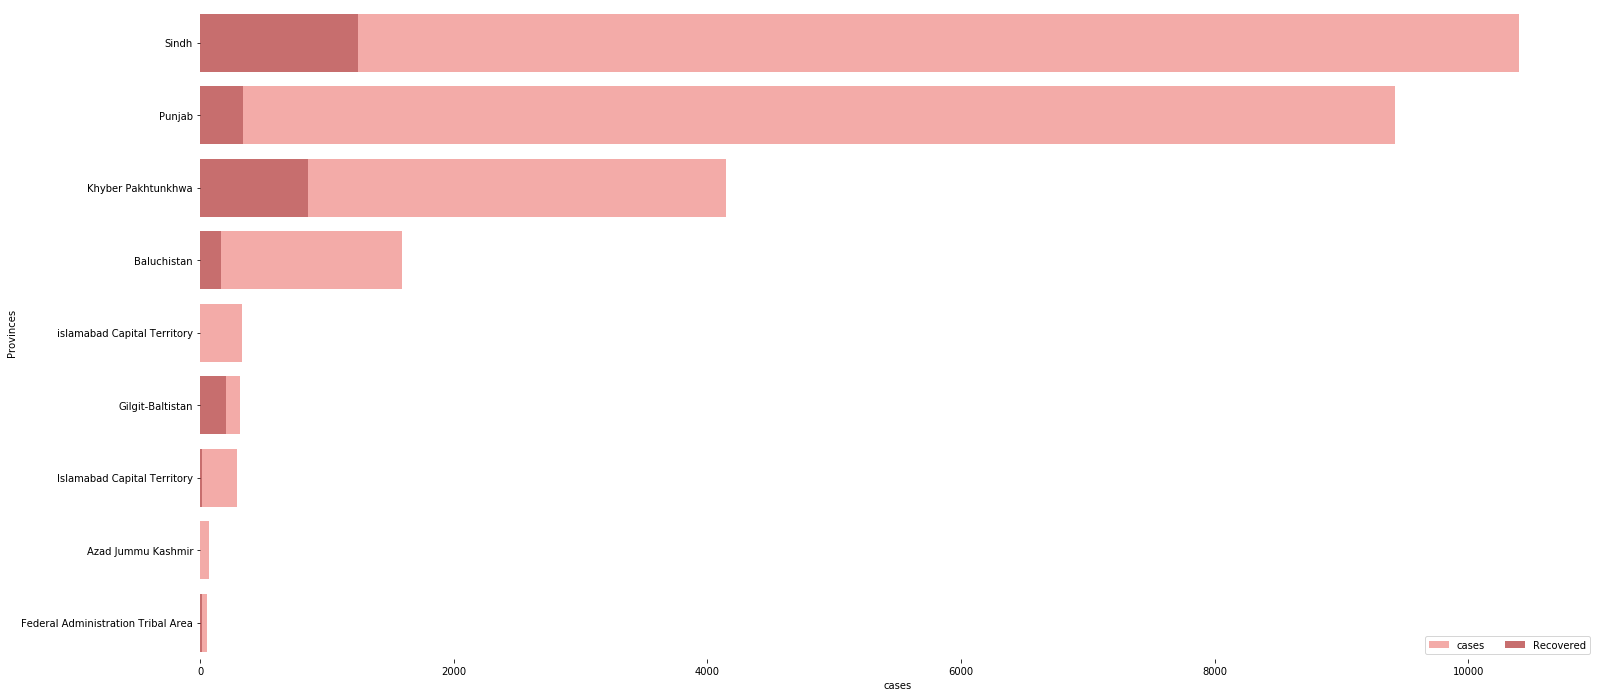

In [27]:
#Plotting how many recovered patients in a particular province all over Pakistan.
province_wise=Pak.groupby('Province')['Cases','Deaths','Recovered'].sum().reset_index()
province_wise=province_wise[province_wise['Cases']>0]

f,ax=plt.subplots(figsize=(25,12)) 
data=province_wise[['Province','Cases','Recovered']]
sns.set_color_codes('pastel')
data.sort_values('Cases',ascending=False,inplace=True)

sns.barplot(x='Cases',y='Province',data=data,label='cases',color='r')


sns.set_color_codes('muted')
sns.barplot(x='Recovered',y='Province',data=data,label='Recovered',color='r')
ax.legend(ncol=2 , loc = 'lower right', frameon = True,)
ax.set(xlim=(0,11000),ylabel="Provinces",xlabel="cases")
sns.despine(left=True, bottom = True)

In [1]:
pip install pystan #to install fbprophet

     |████████████████████████████████| 1.1MB 547kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.3MB 1.4MB/s eta 0:00:01
     |████████████████████████████████| 92kB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 419kB 1.4MB/s eta 0:00:01
  ERROR: Could not find a version that satisfies the requirement httpstan<4.5,>=4.4 (from pystan) (from versions: 0.2.5, 0.3.0, 0.3.1, 0.4.0, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.7.5, 0.7.6, 0.8.0, 0.9.0, 0.10.1, 1.0.0)
ERROR: No matching distribution found for httpstan<4.5,>=4.4 (from pystan)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install fbprophet

     |████████████████████████████████| 71kB 669kB/s eta 0:00:01
     |████████████████████████████████| 2.0MB 1.1MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/29/e7/7aa98bca20168d5864dad95d69d8cf471f7871185b744be7dc17f5a058b4/pystan-3.1.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a5/42/560d269f604d3e186a57c21a363e77e199358d054884e61b73e405dd217c/numpy-1.20.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
     |████████████████████████████████| 9.9MB 359kB/s eta 0:00:01
     |████████████████████████████████| 10.3MB 715kB/s eta 0:00:01
     |████████████████████████████████| 51kB 1.0MB/s eta 0:00:01
     |████████████████████████████████| 133kB 492kB/s eta 0:00:01
     |████████████████████████████████| 81kB 872kB/s eta 0:00:01
  ERROR: Could not find a version that satisfies the requirement httpstan<4.5,>=4.4 (from pystan>=2.14->fbprophet) (from versions: 0.2.5, 0.3.0, 0.3.1, 0.4.0, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0

In [3]:
conda install -c conda-forge fbprophet

ValueError: The python kernel does not appear to be a conda environment.  Please use ``%pip install`` instead.

In [ ]:
from fbprophet import Prophet

In [ ]:
date_wise=Pak.groupby('Date')['Cases'].sum().reset_index()
to_predict=date_wise


In [4]:
to_predict.columns=['ds','y']  #ds and y are the parameters provided to fbprophet model
to_predict['ds']=pd.to_datetime(to_predict['ds'])


NameError: name 'to_predict' is not defined

In [5]:
m=Prophet(interval_width=0.95)   #5% error in model
m.fit(to_predict)
predictions=m.make_future_dataframe(periods=10)  #next 10 days prediction

NameError: name 'Prophet' is not defined

In [6]:
future=m.predict(predictions)
future     #yhat is the actual value, yhat upper and lower give the range

NameError: name 'm' is not defined

In [7]:
x=m.plot(future)  #to compare the actual vs predicted

NameError: name 'm' is not defined